In [1]:
import pandas
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pandas.read_csv(uri_filmes)

filmes.columns = ['id', 'titulo', 'genero']

filmes.head()

,id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
generos = filmes.genero.str.get_dummies()

dados_dos_filmes = pandas.concat([filmes, generos], axis=1)

dados_dos_filmes.head()

,id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
print(generos_escalados.shape)

(9742, 20)


/home/eliasb/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/eliasb/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos: {modelo.labels_}')

Grupos: [2 2 0 ... 0 2 0]


In [5]:
grupos = pandas.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos

print(grupos.transpose().plot.bar(subplots=True, figsize=(30,30), sharex=False))

In [6]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3181,4289,"City of Women, The (Città delle donne, La) (1980)",Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8093,100226,Why Stop Now (2012),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4435,6551,"Anarchist Cookbook, The (2002)",Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5173,8376,Napoleon Dynamite (2004),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5080,7991,Death Race 2000 (1975),Action|Sci-Fi,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5092,8033,How to Steal a Million (1966),Comedy|Crime|Romance,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
7152,71520,"Invention of Lying, The (2009)",Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5479,26249,They Call Me Trinity (1971),Comedy|Western,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7396,79798,I Killed My Mother (J'ai tué ma mère) (2009),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7662,88744,Rise of the Planet of the Apes (2011),Action|Drama|Sci-Fi|Thriller,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [7]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

visualizacao

array([[-16.25428  , -69.206985 ],
       [ 10.6754675, -20.158846 ],
       [ -1.3390838,  52.829403 ],
       ...,
       [ 18.677889 ,   5.5130663],
       [  1.3657   , -62.773922 ],
       [-18.439272 ,  -5.037133 ]], dtype=float32)

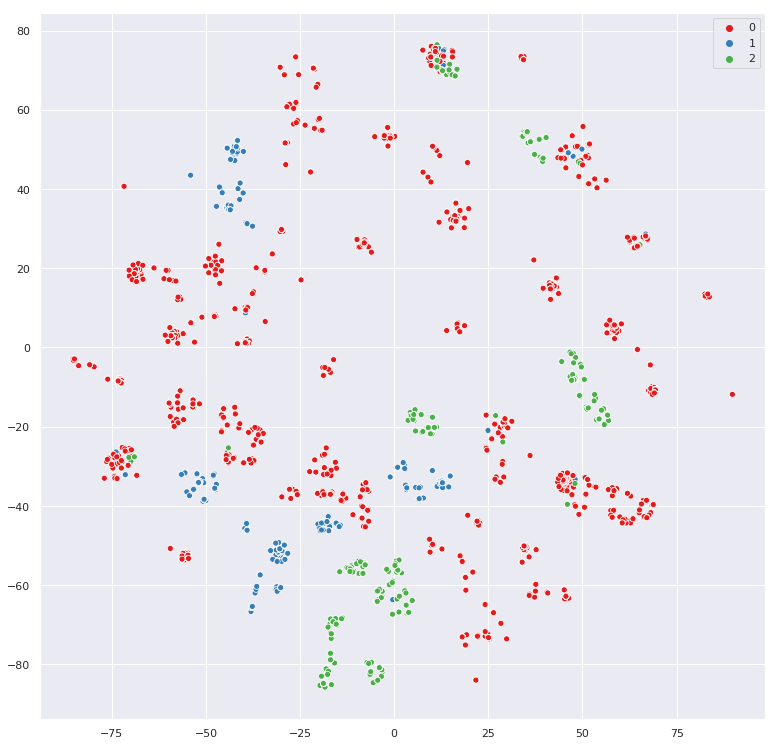

In [8]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13,13)})
sns.scatterplot(
    x=visualizacao[:, 0], 
    y=visualizacao[:,1], 
    hue=modelo.labels_,
    palette=sns.color_palette('Set1',3)
)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e2eec04a8>,
      dtype=object)

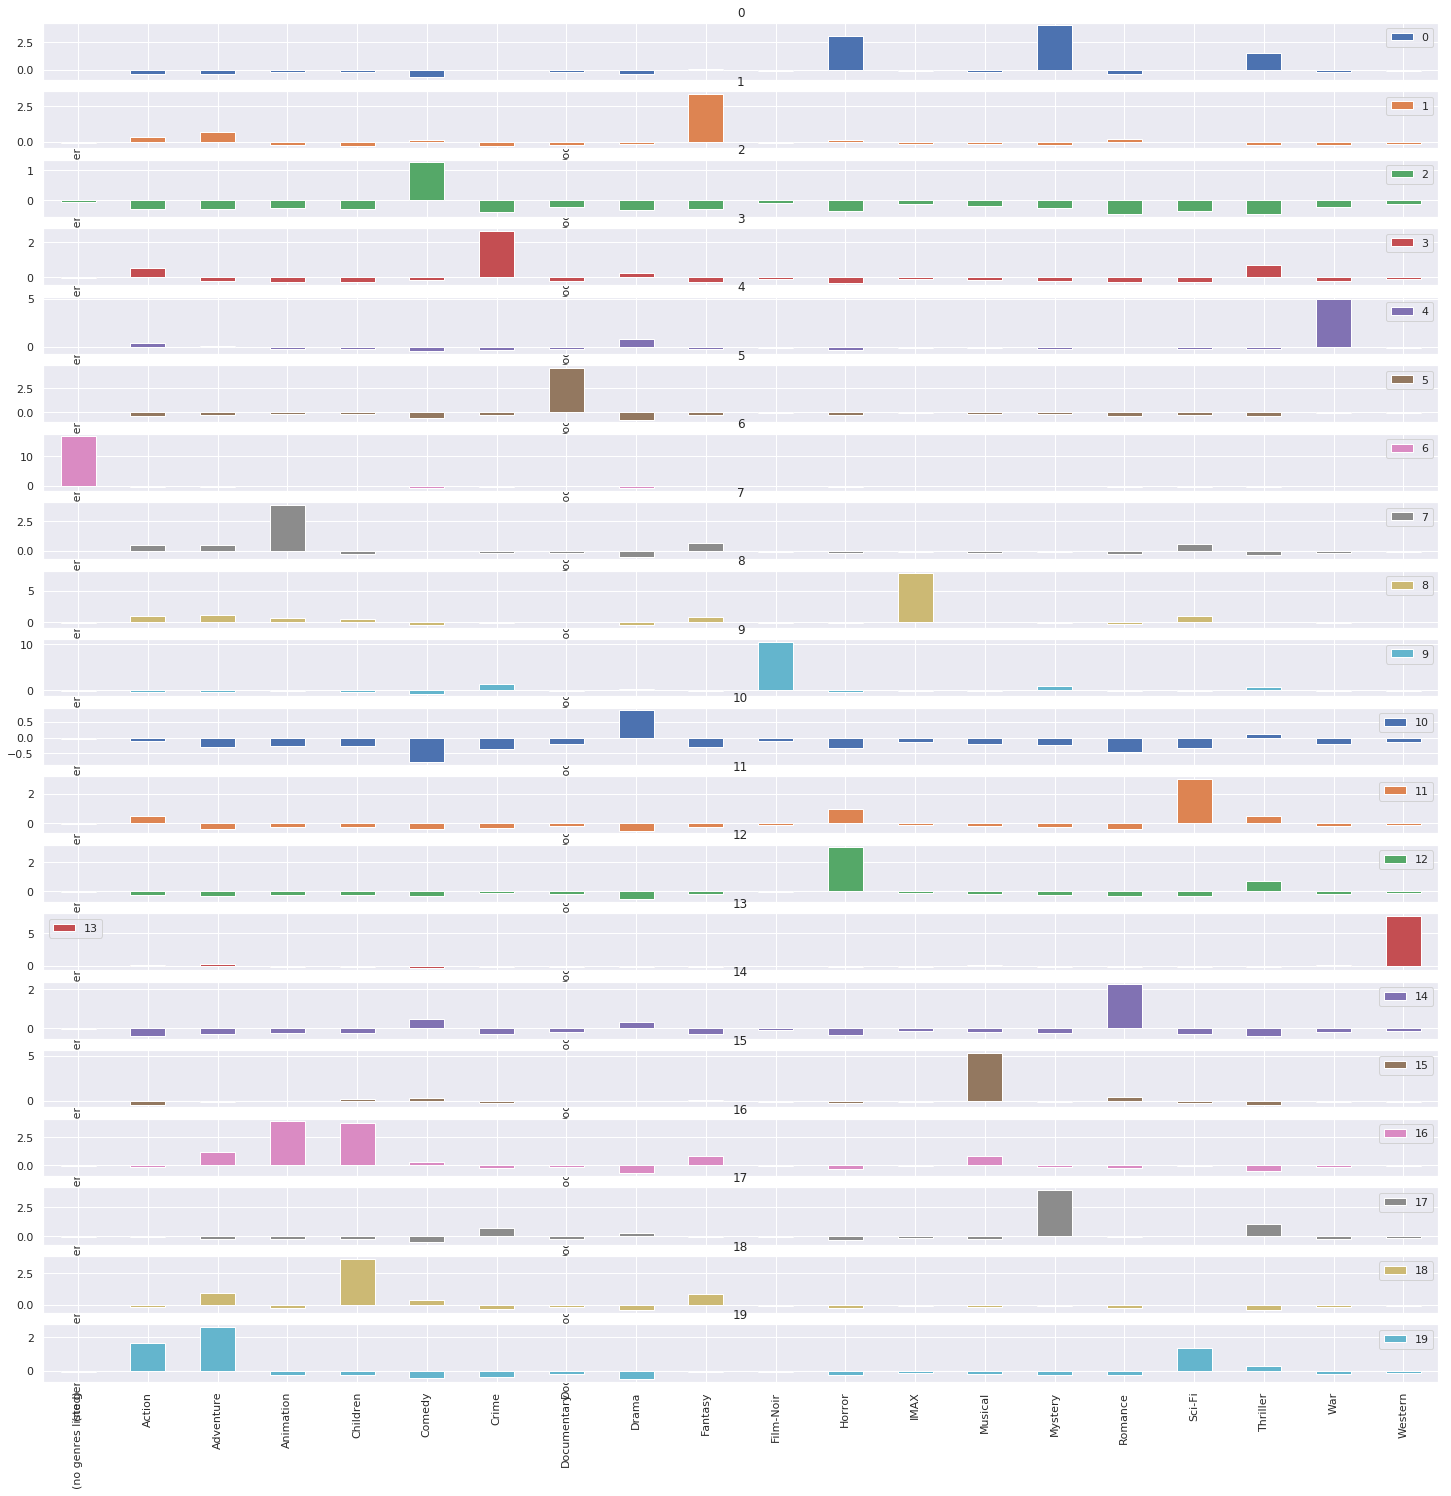

In [12]:
modelo = KMeans(n_clusters=20) # 20 centroides
modelo.fit(generos_escalados) # Treinamento

#Dataframe com os clusters (centroides)
grupos = pandas.DataFrame(
    modelo.cluster_centers_,
    columns = generos.columns
)

grupos.head()

#O transpose faz a transposição de x e y
grupos.transpose().plot.bar(
    subplots = True,
    figsize = (25,25),
    sharex = False
)

In [20]:
# Função para verificar o erro baseado nos clusters

def kmeans(nclusters, generos):
    modelo = KMeans(n_clusters = nclusters)
    modelo.fit(generos)
    return [nclusters, modelo.inertia_]

kmeans(20, generos_escalados)

resultado = [kmeans(i, generos_escalados) for i in range(1,41)]


In [23]:
resultado = pandas.DataFrame(resultado, columns=['grupos', 'inertia'])

resultado

,grupos,inertia
0,1,194840.000000
1,2,179559.057823
2,3,166438.847395
3,4,156660.697573
4,5,146881.526861
5,6,138168.347958
6,7,127783.523344
7,8,119473.154729
8,9,111530.117925
9,10,102682.194660


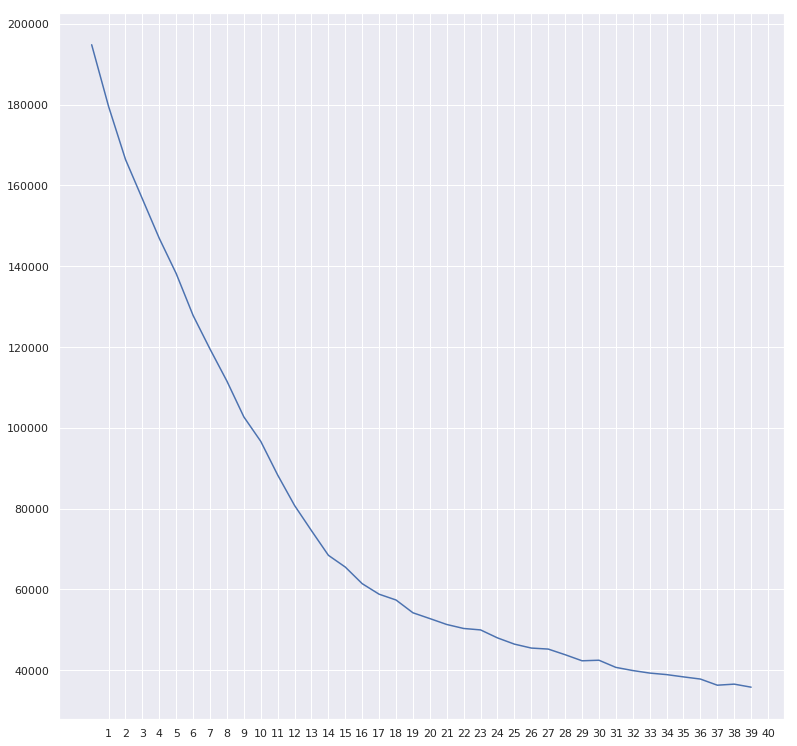

In [26]:
resultado.inertia.plot(xticks = resultado.grupos)
#elbow method > 17

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e2c510b00>,
      dtype=object)

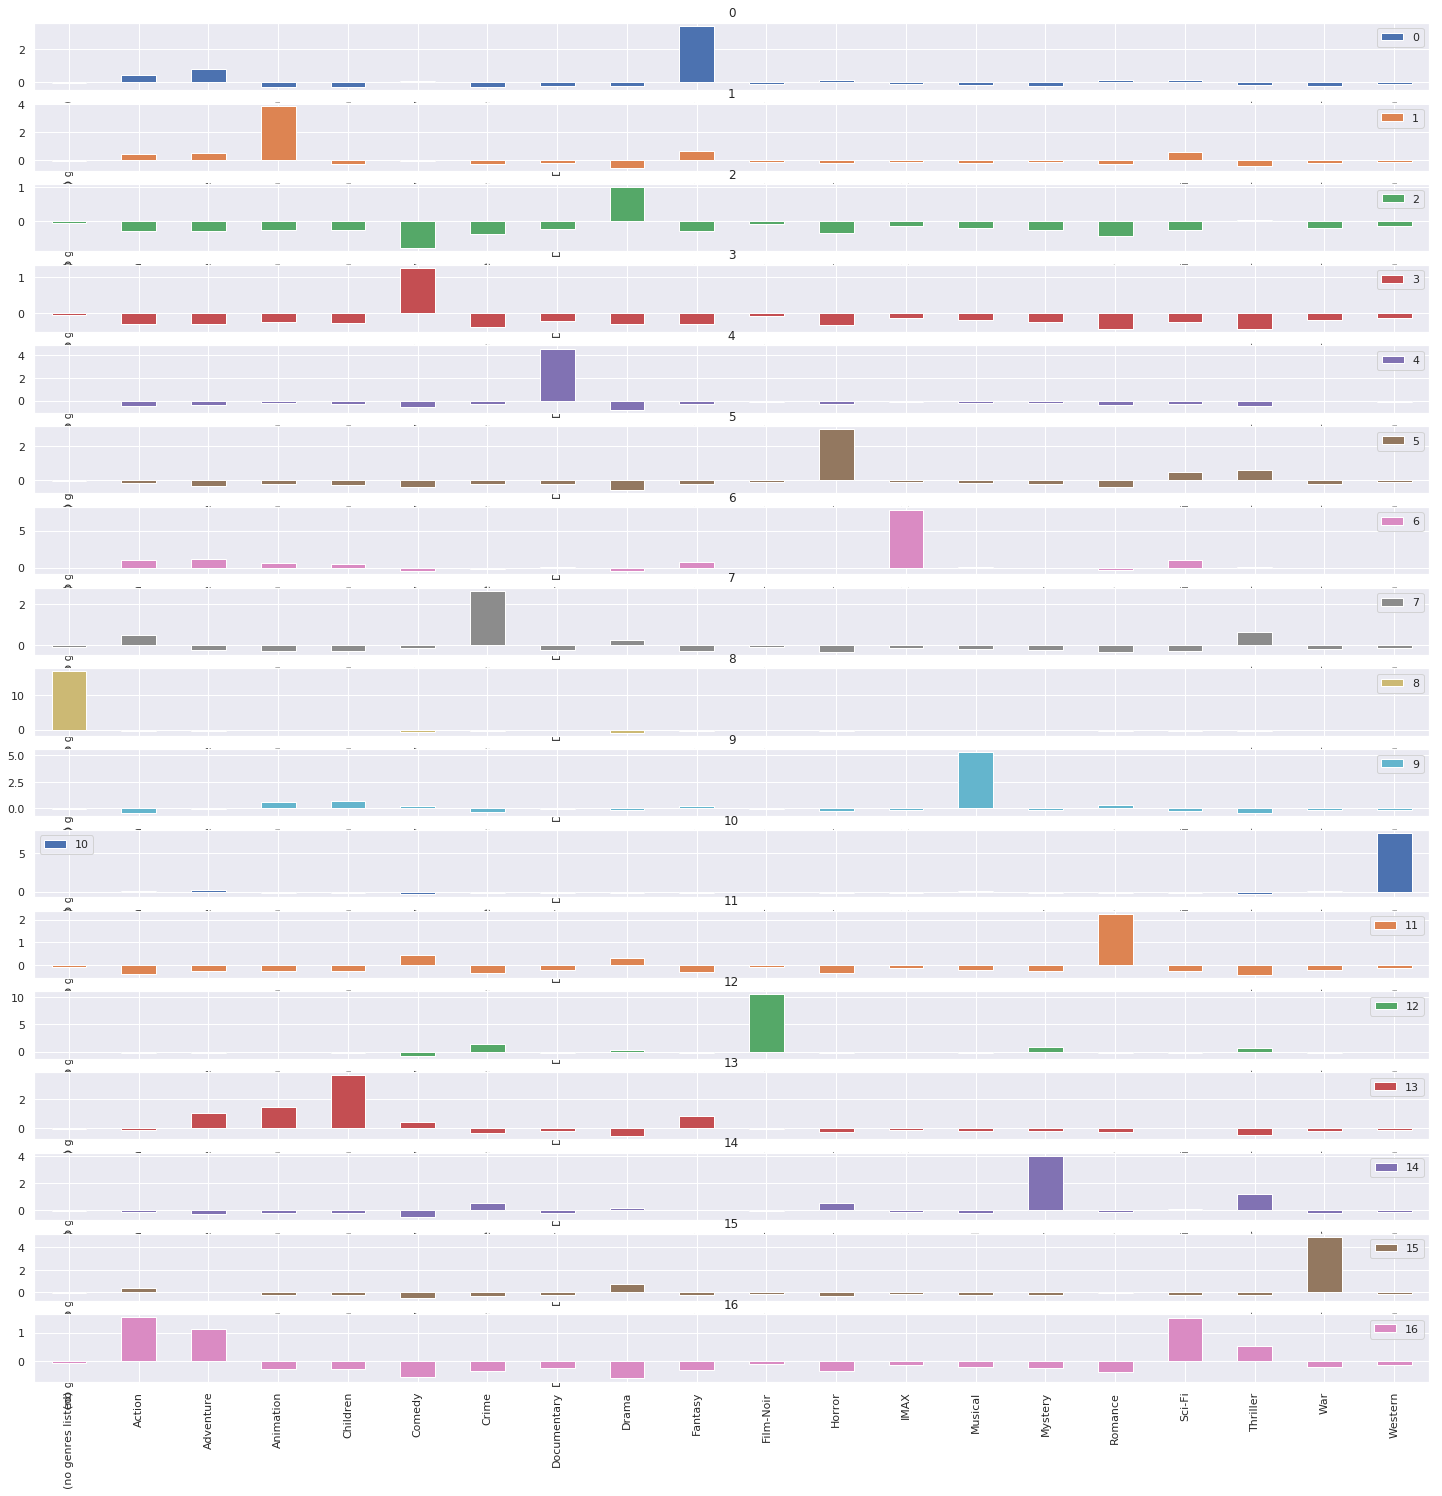

In [29]:
modelo = KMeans(n_clusters=17) # 17 centroides, de acordo com as otimizações
modelo.fit(generos_escalados) # Treinamento

#Dataframe com os clusters (centroides)
grupos = pandas.DataFrame(
    modelo.cluster_centers_,
    columns = generos.columns
)

grupos.head()

#O transpose faz a transposição de x e y
grupos.transpose().plot.bar(
    subplots = True,
    figsize = (25,25),
    sharex = False
)
